### 1. Importing Relevant Libraries

In [1]:
import pandas as pd
from datetime import datetime
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

### 2. Importing Dataset
Link to Melbourne Dataset: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot/data

In [2]:
housing_data = pd.read_csv('melb_data.csv')

housing_data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
housing_data.shape

(13580, 21)

Q1.1 The dataframe consists of 13,580 rows and 21 columns

In [4]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Q1.2 From the above table, we can see that the average land size of all properties is 13,580 m2

In [5]:
# Sort the house prices based on year built
housing_data.sort_values(by='YearBuilt', ascending=False).head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1234,Brighton East,8 Thomas St,2,h,1310000.0,S,Buxton,24/09/2016,10.7,3187.0,...,3.0,2.0,302.0,250.0,2018.0,Glen Eira,-37.91820,145.02310,Southern Metropolitan,6938.0
11136,Newport,50 Peel St,3,h,1195000.0,SP,Williams,12/08/2017,6.2,3015.0,...,2.0,2.0,358.0,NaN,2017.0,Hobsons Bay,-37.84586,144.88948,Western Metropolitan,5498.0
7060,Heidelberg,36 Buckingham Dr,3,h,1030000.0,S,Miles,30/07/2016,10.6,3084.0,...,3.0,2.0,649.0,357.0,2017.0,Banyule,-37.75010,145.08220,Eastern Metropolitan,2890.0
8134,Newport,17 Gordon St,3,t,900000.0,S,Greg,13/05/2017,8.4,3015.0,...,2.0,2.0,575.0,128.0,2017.0,Hobsons Bay,-37.83890,144.86660,Western Metropolitan,5498.0
11157,Pascoe Vale,17 Valerie St,3,h,1114000.0,S,Brad,12/08/2017,8.5,3044.0,...,2.0,2.0,256.0,190.0,2017.0,Moreland,-37.72034,144.93788,Northern Metropolitan,7485.0


Q1.3 Based on the recent listed date, the newest home price is USD 1,310,000

In [6]:
# Find the number of missing values in each column
missing_values = housing_data.isnull().sum()
missing_values

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Q1.4 There were several missing values in the following columns:  
Car                62  
BuildingArea     6450  
YearBuilt        5375  
CouncilArea      1369  

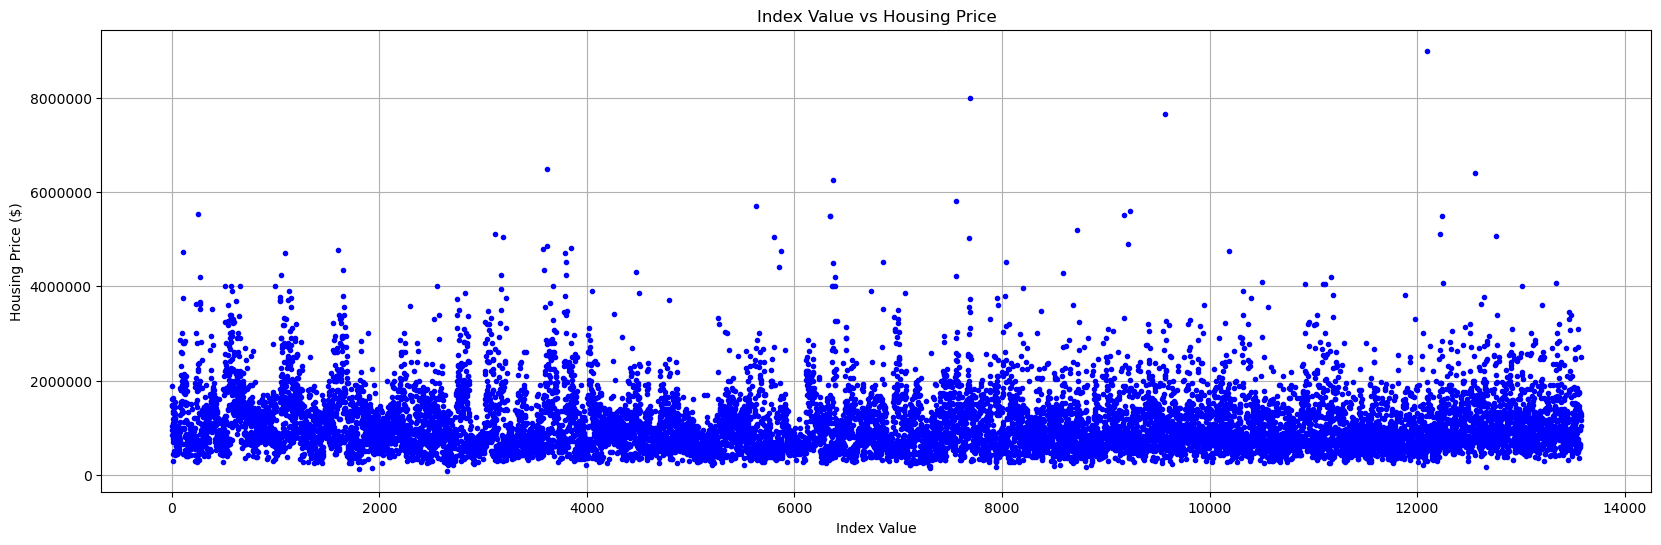

In [7]:
# Plot the index value versus price for the 13,580 entries.
index_values = housing_data.index
housing_prices = housing_data['Price']

# Plot in a scatter plot
plt.figure(figsize=(20, 6))
plt.plot(index_values, housing_prices, marker='o', linestyle='', color='b', markersize=3)  
plt.title('Index Value vs Housing Price')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()




Q1.5 What is a pandas dataframe? What is an index value?

Pandas dataframe is a two dimentional table that stores the values of different data types. Index value is the label for each row


### 3. Cleaning the Data

In [8]:
# Drop the rows with missing values
housing_data = housing_data.dropna()
housing_data.reset_index(drop=True, inplace=True) # Reset the index
housing_data.isnull().sum() # Check if there are still missing values

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [9]:
# Check the new entries for cleaned data
housing_data.shape

(6196, 21)

Q1.6 The cleaned dataset now only has 6,196 rows from previously 13,580 rows

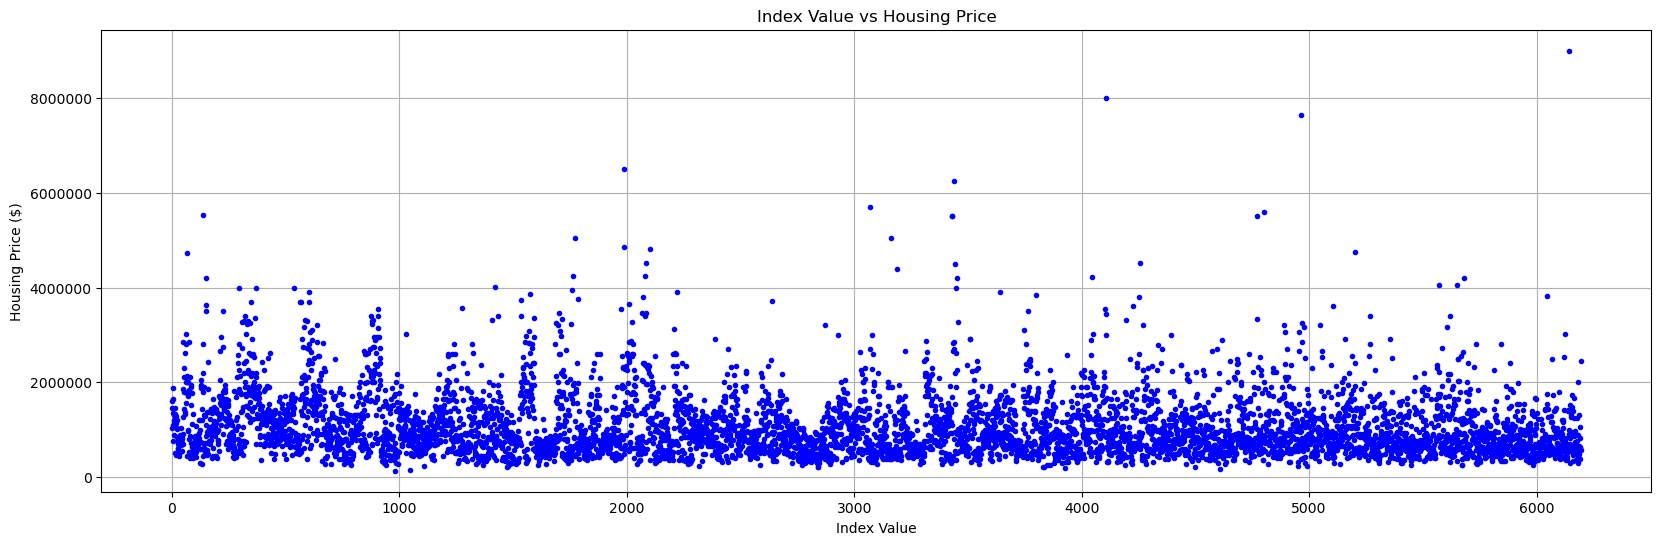

In [10]:
# Plot the index value versus price for the cleaned data
index_values = housing_data.index
housing_prices = housing_data['Price']

# Plot in a scatter plot
plt.figure(figsize=(20, 6))
plt.plot(index_values, housing_prices, marker='o', linestyle='', color='b', markersize=3)
plt.title('Index Value vs Housing Price')
plt.xlabel('Index Value')
plt.ylabel('Housing Price ($)')
plt.grid(True)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()

# Section 2: Building a Machine Learning Model

**Selecting Features**

In [13]:
############################# Selecting features ###############################

# Because we want to predict a house's value based on its features (i.e. number of bedrooms, number of bathrooms, etc), we can set one of the columns as the prediction target.
# In this case, the "Price" is the prediction target. Conventionally, this prediction target is called "y"
y = housing_data.Price

# We'll start by selecting a few features which we may play an important role in determining the price of a house.
# To select some features, we'll need to see a list of all columns in the dataset.
# The columns that are inputted into our model (and later used to make predictions) are called "features."
# Sometimes, you will use all columns except the target ("Price") as features. Other times you'll be better off with fewer features.
# For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.
print(housing_data.columns)    #prints the list of column names
type(housing_data.columns)
print()



Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')



21

#### TO DO: Q2.1 What are the names of all the columns in the dataset? How many columns in the dataset?

Name: ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']
Total of 21 columns

In [15]:
# We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).
# We'll be using these five features to predict house prices.

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']
X = housing_data[melbourne_features]

# Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645,1964.081988
std,0.971079,0.711362,897.449881,90.834824,38.105673
min,1.000000,1.000000,0.000000,0.000000,1196.000000
25%,2.000000,1.000000,152.000000,91.000000,1940.000000
50%,3.000000,1.000000,373.000000,124.000000,1970.000000
75%,4.000000,2.000000,628.000000,170.000000,2000.000000
max,8.000000,8.000000,37000.000000,3112.000000,2018.000000


In [16]:
#use the .head() command to check the first five rows of data
X.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt
0,2,1.0,156.0,79.0,1900.0
1,3,2.0,134.0,150.0,1900.0
2,4,1.0,120.0,142.0,2014.0
3,3,2.0,245.0,210.0,1910.0
4,2,1.0,256.0,107.0,1890.0


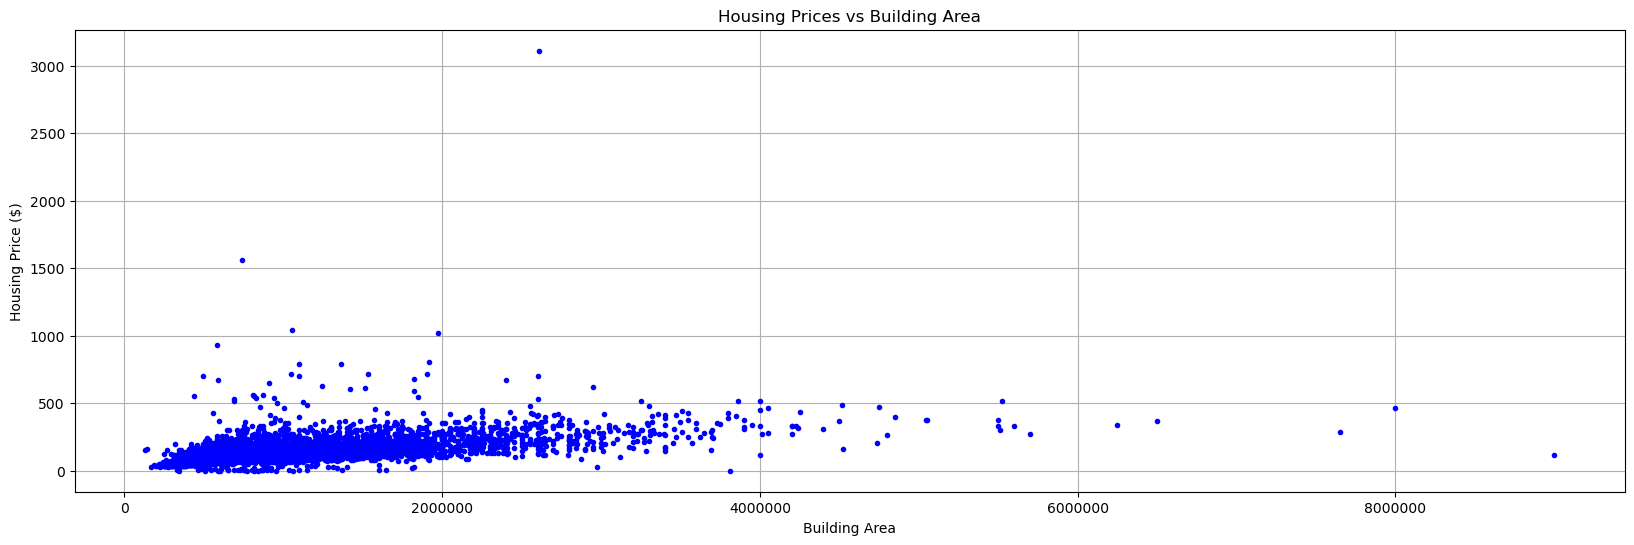

In [17]:
################################################################################
#### TO DO: Q2.2 Plot a graph of building area (x-axis) vs housing price (y-axis). Include this plot in your deliverable
################################################################################
housing_prices = housing_data['Price']
building_area = housing_data['BuildingArea']
plt.figure(figsize=(20, 6))
plt.plot(housing_prices, building_area, marker='o', linestyle='', color='b', markersize=3)
plt.title('Housing Prices vs Building Area')
plt.xlabel('Building Area')
plt.ylabel('Housing Price ($)')
plt.grid(True)


# Disable scientific notation
plt.ticklabel_format(style='plain', axis='both')

plt.show()

In [18]:
################### Build a Machine Learning Model #############################

# Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=2)   # Many machine learning models allow some randomness in model training.. Specifying a number for random_state ensures you get the same results in each run.

# Fit the model
melbourne_model.fit(X, y)
print("Congratulations! You just made a machine learning model called Decision Tree. This model can be used to make house price predictions!")

Congratulations! You just made a machine learning model called Decision Tree. This model can be used to make house price predictions!


In [20]:
# We now have a fitted model that we can use to make predictions.

# Make predictions for all houses in your dataset
predictions = melbourne_model.predict(X)

# Create a new DataFrame with the predicted prices added as a new column
predicted_data = housing_data.copy()  # Create a copy of the original DataFrame
predicted_data['Predicted_Price'] = predictions  # Add a new column for predicted prices

# You can visualize the decision tree, by uncommenting the three lines of code below
#plt.figure(figsize=(20, 10))  # Adjust figure size as needed
#plot_tree(melbourne_model, filled=True, feature_names=['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt'])
#plt.show()

# Print the first five rows of the DataFrame with predicted prices
print(predicted_data[['Price', 'Predicted_Price', 'Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt']].head(n=15))



        Price  Predicted_Price  Rooms  Bathroom  Landsize  BuildingArea  \
0   1035000.0        1035000.0      2       1.0     156.0          79.0   
1   1465000.0        1465000.0      3       2.0     134.0         150.0   
2   1600000.0        1600000.0      4       1.0     120.0         142.0   
3   1876000.0        1876000.0      3       2.0     245.0         210.0   
4   1636000.0        1636000.0      2       1.0     256.0         107.0   
5   1097000.0        1097000.0      2       1.0     220.0          75.0   
6   1350000.0        1350000.0      3       2.0     214.0         190.0   
7    750000.0         750000.0      2       2.0       0.0          94.0   
8   1310000.0        1310000.0      2       1.0     238.0          97.0   
9   1200000.0        1200000.0      3       2.0     113.0         110.0   
10  1176500.0        1176500.0      3       1.0     138.0         105.0   
11   890000.0         890000.0      2       1.0     150.0          73.0   
12  1330000.0        1330

#### TO DO: Q2.3 Review the actual price ("Price") and predicted price ("Predicted Price") and summarize your thoughts. Look at the first fifteen rows of the dataframe.

Except for row 13, the predicted price and the actual price is exactly the same for all rows, meaning that this model has a high accuracy in predicting the price.

You've built a model. But how good is it?

We can use model validation to measure the quality of our model. Measuring model quality is the key to iteratively improving our  models.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error, also called MAE. The prediction error for each house is: error = actual price - predicted price

So if a house cost 150,000 USD and you predicted it would cost 100,000 USD the error is 50,000 USD. With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. The MAE is our measure of model quality. With the MAE, we can say, "on average, our predictions are off by about X amount."

In [21]:
#the library/package we must import to calculate MAE
from sklearn.metrics import mean_absolute_error

#Here's how we calculate mean absolute error:
predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)


3905.403155054543

2.4. A model is better with a lower MAE. Since MAE is the mean of all aboslute errors in a dataset, a lower MAE means that on average each predicted datapoint has less error.
2.5. The MAE is 3905.403155054543. The reason we take the absolute value of the difference between the actiual price and the predicted prce is because the predicted value can be higher or lower than the acutal valule, without taking the absolute value we can't measure how far away is the actual datapoint is from the predicted point, leading to inaccurate representation of error.

In [23]:
# The scikit-learn library has a function train_test_split to break up the data into two pieces.
# We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

# Here's the code:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to the random_state argument guarantees we get the same split every time we run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(train_X, train_y)
print("Congratulations!  You've made a new machine learning model with training data!")
print()

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print("And you've tested your model on data that the model has never seen before (validation data).")
print()
print("The mean absolute error for your new model is:")
print(mean_absolute_error(val_y, val_predictions))



Congratulations!  You've made a new machine learning model with training data!

And you've tested your model on data that the model has never seen before (validation data).

The mean absolute error for your new model is:
381587.9068216054


#### TO DO: Q2.6 What is the MAE for your new model? Why is the MAE for the new model larger than the MAE from our previous model?
The mean absolute error for your new model is 381587.9068216054. It is larger because the second model is trained on one dataset, and validated on another dataset(Unseen Data)

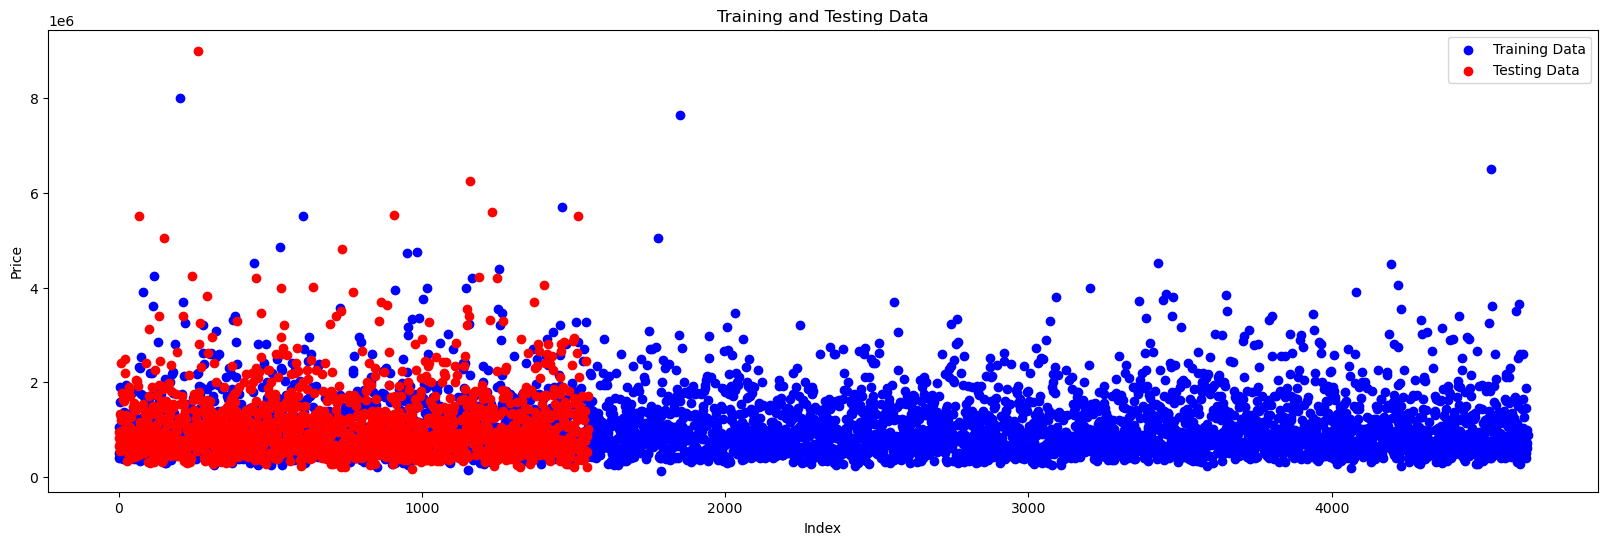


Training data percentage: 75.0
Testing data percentage: 25.0


In [24]:
# Create an array of indices for both training and testing data
train_indices = np.arange(len(train_y))
val_indices = np.arange(len(val_y))

# Plot training data
plt.figure(figsize=(20, 6))
plt.scatter(train_indices, train_y, color='blue', label='Training Data')

# Plot testing data
plt.scatter(val_indices, val_y, color='red', label='Testing Data')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Training and Testing Data')
plt.legend()
plt.show()

## What percent of the data is used for training and what percent of the data is used for testing? ####
total_samples = len(X)        #Find the total number of samples in your dataset
train_samples = len(train_X)  #Find the total number of samples in your training data
test_samples = len(val_X)     #Find the total number of samples in your validation data

train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100
print()
print("Training data percentage:", train_percentage)
print("Testing data percentage:", test_percentage)

################################################################################
#### TO DO: Q2.7 What percentage of your entries is used for training the model? What percentage of your entries is used for testing the model?
################################################################################

Training percentage: 75%, Testing Percentage: 25%

In [28]:
#### Random Forest Model ####

# The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree.
# It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.
# If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

#import the libraries need to run and evaluate a Random Forest ML model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))


#import the libraries need to run a XGBoost Model
from xgboost import XGBRegressor
# create model instance
bst = XGBRegressor(random_state=1)
# fit model
bst.fit(train_X, train_y)
# make predictions
preds = bst.predict(val_X)
print(mean_absolute_error(val_y, preds))

287238.5806363639
288202.8806891543


#### TO DO: Q4.1 What is the MAE for your Random Forest model?

 The MAE of Random Forest model is 287238.5806363639
#### TO DO: Q4.2 What is the difference between Decision Tree and Random Forest models?

A Decision Tree is a simple, interpretable model that represents decisions and their possible consequences. 
A Random Forest operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

#### TO DO: Q4.3 Use the machine learning model XGBoost to train and test a new model. What is the MAE for your XGBoost model?
The MAE of XGBoost is 288202.8806891543